In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- gym.make('...') : func        
    returns env
- env.reset() : func
- env.render() : func
- env.step(..., action, ...) : func | returns (observation, reward, done, info)


- env.action_space : Space obj
- env.observation_space : Space obj

In [6]:
env = gym.make('FrozenLake8x8-v0')
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [68]:
def get_default_policy(env, seed=0):
    if seed is not None:
        np.random.seed(1)
        
    n_state = env.observation_space.n
    n_act = env.action_space.n
    
    policy = np.random.uniform(size=(n_state,n_act)) # sample random number between 0 and 1
    policy = policy/np.sum(policy,axis=1,keepdims=True) # make it sum to 1
    
    return policy

In [48]:
def plot_policy(policy):
    plt.figure(num=0)
    plt.imshow(np.ones((8,8,3)))
    plt.title("Policy")  
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="r",alpha=policy[s][0],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="r",alpha=policy[s][1],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="r",alpha=policy[s][2],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="r",alpha=policy[s][3],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
    plt.show()

Initial Policy Distribution:



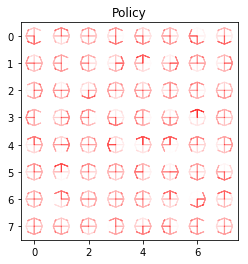

[[ 0.29   0.5    0.     0.21 ]
 [ 0.19   0.12   0.242  0.448]
 [ 0.194  0.264  0.205  0.336]
 [ 0.115  0.493  0.015  0.377]
 [ 0.317  0.425  0.107  0.151]
 [ 0.289  0.349  0.113  0.25 ]
 [ 0.462  0.472  0.045  0.021]
 [ 0.108  0.56   0.063  0.269]
 [ 0.383  0.213  0.277  0.126]
 [ 0.3    0.365  0.008  0.328]
 [ 0.352  0.267  0.1    0.281]
 [ 0.059  0.255  0.518  0.167]
 [ 0.258  0.117  0.017  0.608]
 [ 0.207  0.26   0.481  0.052]
 [ 0.286  0.073  0.293  0.348]
 [ 0.063  0.255  0.427  0.255]
 [ 0.028  0.304  0.376  0.292]
 [ 0.367  0.228  0.351  0.053]
 [ 0.092  0.535  0.263  0.11 ]
 [ 0.337  0.126  0.273  0.264]
 [ 0.339  0.239  0.288  0.134]
 [ 0.105  0.35   0.167  0.377]
 [ 0.282  0.265  0.049  0.404]
 [ 0.269  0.346  0.244  0.142]
 [ 0.431  0.274  0.001  0.294]
 [ 0.156  0.251  0.422  0.17 ]
 [ 0.367  0.252  0.006  0.375]
 [ 0.346  0.499  0.086  0.069]
 [ 0.381  0.284  0.027  0.308]
 [ 0.3    0.367  0.283  0.049]
 [ 0.062  0.082  0.088  0.768]
 [ 0.308  0.193  0.198  0.301]
 [ 0.063

In [69]:
np.set_printoptions(precision=3,suppress=True)
print("Initial Policy Distribution:\n")

policy = get_default_policy(env)
plot_policy(policy)
print(policy)

### Policy Evaluation

$$\begin{align}
v_{k+1}(s) &\doteq \sum_a \pi(a \mid s) Q(s, a) \\
&\doteq \sum_a \pi(a \mid s) \sum_{s', r} p(s', r \mid s, a) \bigg[ r + \gamma v_{k}(s') \bigg] \\
\end{align}$$

In [92]:
def policy_evaluation(env, policy, gamma=0.99, epsilon=1e-6):
    n_state = env.observation_space.n
    n_act = env.action_space.n
    P = env.unwrapped.P  # transition info
    
    np.random.seed(1)
    v = np.random.uniform(size=(n_state,))  # state-value table

    while True:
        v_prime = np.zeros((n_state,))
        for s in P.keys():  # for all states
            for a in P[s].keys():  # for all actions
                for prob, next_s, reward, done in P[s][a]:
                    v_prime[s] += (reward + gamma*v[next_s])*prob * policy[s][a]

        dist = np.max(np.abs(v - v_prime))
        v = v_prime
        if dist < epsilon:
            break
    return v

In [93]:
def plot_results(policy, value): # For visualization
    plt.figure(num=0)
    plt.imshow(np.reshape(value,(8,8)))
    plt.title("Value Function")  
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="r",alpha=policy[s][0],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="r",alpha=policy[s][1],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="r",alpha=policy[s][2],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="r",alpha=policy[s][3],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
    plt.show()

Policy evaluation for random policy

Value of current policy:


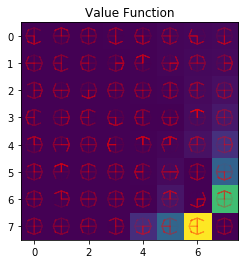

Computation Time : 1.41


In [94]:
if __name__ == '__main__':
    import time
    start = time.time()
    
    policy = get_default_policy(env)
    print('Policy evaluation for random policy\n')
    value = policy_evaluation(env, policy, gamma = 0.99, epsilon = 1e-6)
    print('Value of current policy:')
    plot_results(policy, value)
    
    print("Computation Time : %.2f"%(time.time() - start))
    

### Policy Improvement

$$\begin{align}
\pi'(s) &\doteq \arg\max_a Q(s, r) \\
&\doteq \arg\max_a \sum_{s', r} p(s', r \mid s, a) \bigg[ r + \gamma v_{\pi}(s') \bigg]
\end{align}$$

In [79]:
def policy_improvement(env, v, gamma=0.99):
    n_state = env.observation_space.n
    n_act = env.action_space.n
    P = env.unwrapped.P
    
    q = np.zeros((n_state, n_act))

    for s in P.keys():
        for a in P[s].keys():
            for prob, next_s, reward, done in P[s][a]:
                q[s, a] += (reward + gamma*v[next_s]) * prob
    policy = np.zeros((n_state, n_act))
    policy[np.arange(n_state), np.argmax(q, axis=1)] = 1
    
    return policy

In [80]:
def policy_improvement(env, v, gamma = 0.99):
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    q = np.zeros((n_state,n_act))
    
    P = env.unwrapped.P
    
    for s in P.keys():# For all states s,
        for a in P[s].keys():# For all actions a
            for prob, next_s, reward, done in P[s][a]:
                q[s,a] += (reward + gamma*v[next_s])*prob # Compute q[s,a] from v[s'], keep adding r[s,a,s']+gamma*v[s'] for all transition
                    
    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1
    
    return policy

Policy improvement

Improved Policy:


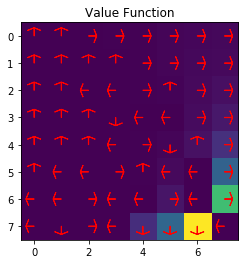

In [81]:
if __name__ == '__main__':
    policy = get_default_policy(env)
    print('Policy improvement\n')
    policy = policy_improvement(env, value)
    print('Improved Policy:')
    plot_results(policy, value)

### Policy Iteration

In [87]:
def policy_iteration(env):
    policy = get_default_policy(env)

    while True:
        value = policy_evaluation(env, policy)  # find v_pi
        policy_prime = policy_improvement(env, value)  # get greedy policy w.r.t v_pi

        if (policy == policy_prime).all():
            break
        policy = policy_prime
        
    return policy, value

Policy Iteration
Computation Time : 14.66


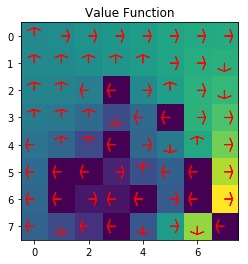

In [88]:
if __name__=='__main__': 
    print("Policy Iteration")
    import time
    start = time.time()
    policy, value = policy_iteration(env)
    print("Computation Time : %.2f"%(time.time() - start))
    plot_results(policy, value)

### Numpy Version

In [105]:
def policy_evaluation_np(env, P, r, policy, gamma=0.99, epsilon=1e-6):
    n_state = env.observation_space.n
    n_act = env.action_space.n

    v = np.random.uniform(size=(n_state,))  # state-value table

    while True:
        '''
        axis0 : s
        axis1 : a
        axis2 : s'
        '''
        
        q = np.sum((r + gamma * np.tile(v[np.newaxis, np.newaxis, :], reps=(n_state, n_act, 1))) * P, axis=2)
        v_prime = np.sum(policy * q, axis=1)
        dist = np.max(np.abs(v - v_prime))
        v = v_prime
        if dist < epsilon:
            break
    return v

In [106]:
def policy_improvement_np(env, P, r, v, gamma=0.99):
    n_state = env.observation_space.n
    n_act = env.action_space.n

    q = np.sum((r + gamma * np.tile(v[np.newaxis, np.newaxis, :], reps=(n_state, n_act, 1))) * P, axis=2)
    
    policy = np.zeros((n_state, n_act))
    policy[np.arange(n_state), np.argmax(q, axis=1)] = 1
    
    return policy

In [107]:
def policy_iteration_np(env):
    obs_space = env.observation_space  # state space
    n_state = obs_space.n # num of possible states

    policy = get_default_policy(env)
    
    P = np.zeros((n_state, n_act, n_state))
    r = np.zeros((n_state, n_act, n_state))
    for s in env.unwrapped.P.keys():
        for a in env.unwrapped.P[s].keys():
            for prob, next_s, reward, done in env.unwrapped.P[s][a]:
                P[s][a][next_s] = prob
                r[s][a][next_s] = reward
    
    while True:
        value = policy_evaluation_np(env, P, r, policy)  # find v_pi
        policy_prime = policy_improvement_np(env, P, r, value)  # get greedy policy w.r.t v_pi

        if (policy == policy_prime).all():
            break
        policy = policy_prime
        
    return policy, value

Policy Iteration Compact
Computation Time : 0.78



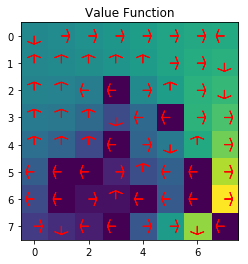

t = 0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 1
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 2
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 3
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 4
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 5
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 6
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 7
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 8
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 9
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 10
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 11
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF

In [108]:
if __name__=='__main__':
    import gym
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    env = gym.make('FrozenLake8x8-v0')
    n_state = env.observation_space.n
    n_act = env.action_space.n
    print("Policy Iteration Compact")
    import time
    start = time.time()
    policy, value = policy_iteration_np(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')
    plot_results(policy, value)
    
    obs = env.reset()
    for t in range(10000):
        print('t = %d'%t)
        env.render()
        print('')
        action = np.random.choice(n_act, 1, p=policy[obs])[0]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        if done:
            break
    env.render()
    env.close()

$s'$에서의 optimal을 $V^*(s') = \max_{\pi}V_{\pi}(s')$로 찾으면, 인접한 $s$에서의 optimal은 $V^*(s) = \max_a \sum_s' [r(s, a, s') + \gamma V^*(s')]P(s' \mid s, a)$ 와 같이 찾을 수 있다.